## Objective:
The goal of developing a model to predict customer churn for a subscription-based service or business is to identify customers who are at risk of leaving the service before they actually do. By analyzing historical customer data—such as usage behavior, demographics, or other patterns—the model aims to highlight potential "churners" 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

In [3]:
Dataset = pd.read_csv(r"C:\Users\Komal Pandey\Downloads\archive(3)\Churn_Modelling.csv")
Dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
Dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
x = Dataset.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


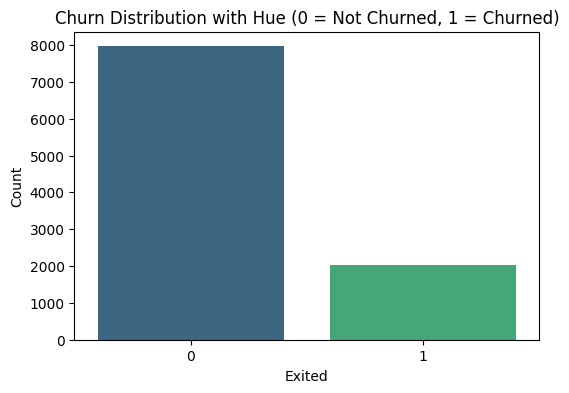

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', hue='Exited', data=Dataset, palette='viridis', dodge=False, legend=False)
plt.title('Churn Distribution with Hue (0 = Not Churned, 1 = Churned)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

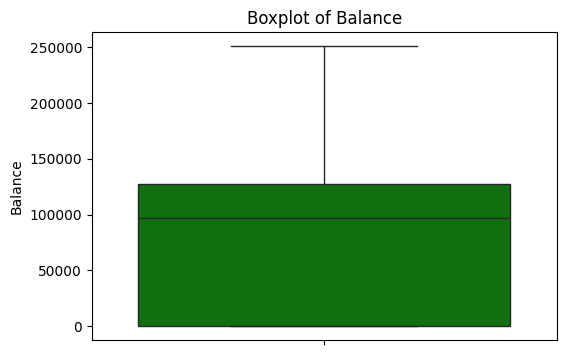

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(y=Dataset['Balance'], color='green')
plt.title('Boxplot of Balance')
plt.ylabel('Balance')
plt.show()

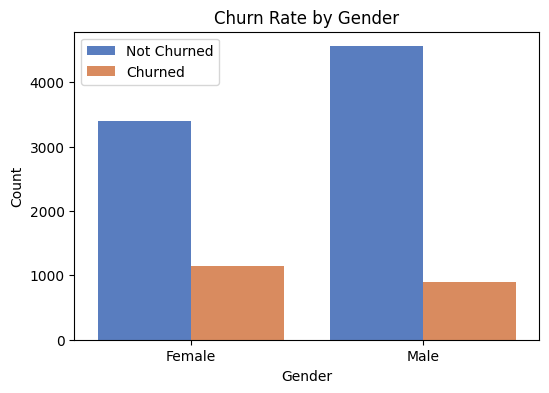

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Exited', data=Dataset, palette='muted')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()

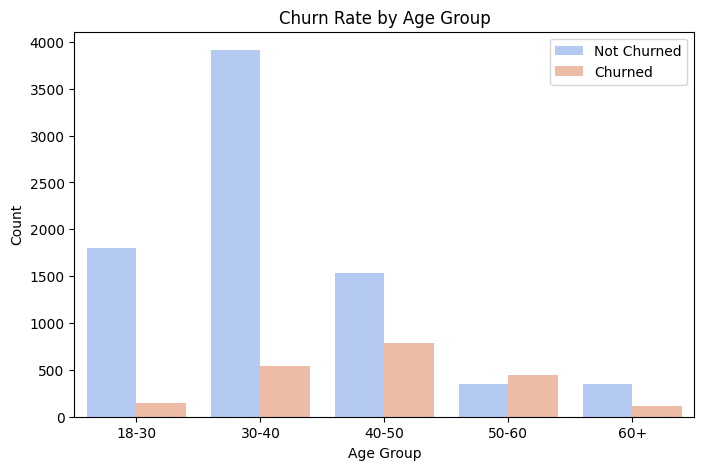

In [17]:
Dataset['Age_Group'] = pd.cut(Dataset['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

plt.figure(figsize=(8,5))
sns.countplot(x='Age_Group', hue='Exited', data=Dataset, palette='coolwarm')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()

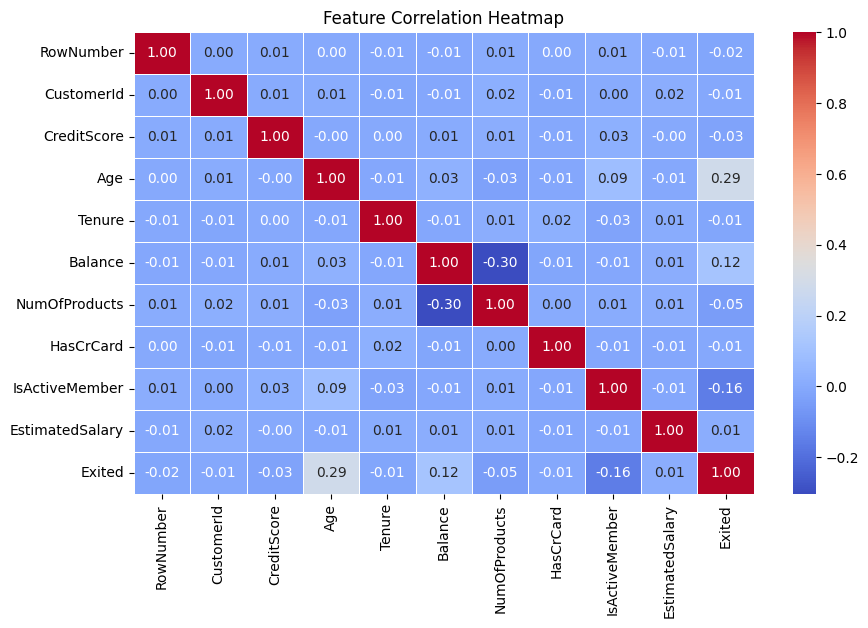

In [18]:
corr_matrix = Dataset.select_dtypes(include=["number"]).corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
y = Dataset.Exited.values
y

array([1, 0, 1, ..., 1, 1, 0])

In [25]:
x = pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [27]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [33]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train_sc,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred = model.predict(x_test_sc)

In [35]:
print(f'The Accuracy :- {accuracy_score(y_pred,y_test)*100}')
print(f'The Precision score : - {precision_score(y_pred,y_test)*100}')

The Accuracy :- 83.08
The Precision score : - 22.30769230769231
